# Selecting the best regression model

[data source](https://www.kaggle.com/junkal/selecting-the-best-regression-model/data)

### Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## 1. Exploratory analysis and data pre-processing

### Load and read dataset from local hard-disk

In [2]:
house_data = pd.read_csv('datasets/kc_house_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Shape of datasets

In [3]:
house_data.shape

(21613, 21)

### Info of datasets

In [4]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


### Checking `NaN` Values

In [5]:
house_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 2. Feature's Engineering

### Convert data types in suitable for  Regression model

In [6]:
house_data['date'] = pd.to_datetime(house_data['date'])
house_data = house_data.set_index('id')

house_data.price = house_data.price.astype(int)
house_data.bathrooms = house_data.bathrooms.astype(int)
house_data.floors = house_data.floors.astype(int)

In [7]:
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Find age of building and also `Label encoded` to `yr_renovates` and remove irrelevante columns

In [8]:
house_data['house_age'] = house_data['date'].dt.year - house_data['yr_built']
house_data['renovated'] = house_data['yr_renovated'].apply(lambda x:0 if x == 0 else 1)

house_data = house_data.drop('date', axis =1)
house_data = house_data.drop('yr_renovated', axis=1)
house_data = house_data.drop('yr_built', axis=1)

house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
id,,,,,,,,,,,,,,,,,,,
7129300520,221900,3,1,1180,5650,1,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,59,0
6414100192,538000,3,2,2570,7242,2,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,63,1
5631500400,180000,2,1,770,10000,1,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,82,0
2487200875,604000,4,3,1960,5000,1,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,49,0
1954400510,510000,3,2,1680,8080,1,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,28,0


### Shape of dataset

In [9]:
house_data.shape

(21613, 19)

### Find `count`, `mean`, `std` etc up to two decimale digits

In [10]:
pd.set_option('precision', 2)

house_data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,5.40e+05,367127.20,75000.00,321950.00,450000.00,645000.00,7.70e+06
bedrooms,21613.0,3.37e+00,0.93,0.00,3.00,3.00,4.00,3.30e+01
bathrooms,21613.0,1.75e+00,0.73,0.00,1.00,2.00,2.00,8.00e+00
sqft_living,21613.0,2.08e+03,918.44,290.00,1427.00,1910.00,2550.00,1.35e+04
sqft_lot,21613.0,1.51e+04,41420.51,520.00,5040.00,7618.00,10688.00,1.65e+06
floors,21613.0,1.45e+00,0.55,1.00,1.00,1.00,2.00,3.00e+00
waterfront,21613.0,7.54e-03,0.09,0.00,0.00,0.00,0.00,1.00e+00
view,21613.0,2.34e-01,0.77,0.00,0.00,0.00,0.00,4.00e+00
condition,21613.0,3.41e+00,0.65,1.00,3.00,3.00,4.00,5.00e+00
grade,21613.0,7.66e+00,1.18,1.00,7.00,7.00,8.00,1.30e+01


### Correlation matrix

In [11]:
correlation = house_data.corr(method='pearson')
correlation

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
price,1.00,3.08e-01,0.51,0.70,8.97e-02,2.37e-01,2.66e-01,3.97e-01,3.64e-02,0.67,6.06e-01,0.32,-5.32e-02,3.07e-01,0.02,5.85e-01,8.24e-02,-0.05,1.26e-01
bedrooms,0.31,1.00e+00,0.47,0.58,3.17e-02,1.56e-01,-6.58e-03,7.95e-02,2.85e-02,0.36,4.78e-01,0.30,-1.53e-01,-8.93e-03,0.13,3.92e-01,2.92e-02,-0.15,1.86e-02
bathrooms,0.51,4.67e-01,1.00,0.70,8.53e-02,4.85e-01,5.88e-02,1.77e-01,-1.26e-01,0.61,6.40e-01,0.25,-1.60e-01,3.14e-02,0.18,5.10e-01,8.08e-02,-0.43,6.00e-02
sqft_living,0.70,5.77e-01,0.70,1.00,1.73e-01,3.53e-01,1.04e-01,2.85e-01,-5.88e-02,0.76,8.77e-01,0.44,-1.99e-01,5.25e-02,0.24,7.56e-01,1.83e-01,-0.32,5.51e-02
sqft_lot,0.09,3.17e-02,0.09,0.17,1.00e+00,-8.95e-03,2.16e-02,7.47e-02,-8.96e-03,0.11,1.84e-01,0.02,-1.30e-01,-8.57e-02,0.23,1.45e-01,7.19e-01,-0.05,7.75e-03
floors,0.24,1.56e-01,0.48,0.35,-8.95e-03,1.00e+00,1.96e-02,2.47e-02,-2.93e-01,0.47,5.18e-01,-0.24,-9.67e-02,2.96e-02,0.16,2.97e-01,-1.33e-02,-0.58,-7.85e-03
waterfront,0.27,-6.58e-03,0.06,0.10,2.16e-02,1.96e-02,1.00e+00,4.02e-01,1.67e-02,0.08,7.21e-02,0.08,3.03e-02,-1.43e-02,-0.04,8.65e-02,3.07e-02,0.03,9.33e-02
view,0.40,7.95e-02,0.18,0.28,7.47e-02,2.47e-02,4.02e-01,1.00e+00,4.60e-02,0.25,1.68e-01,0.28,8.48e-02,6.16e-03,-0.08,2.80e-01,7.26e-02,0.05,1.04e-01
condition,0.04,2.85e-02,-0.13,-0.06,-8.96e-03,-2.93e-01,1.67e-02,4.60e-02,1.00e+00,-0.14,-1.58e-01,0.17,3.03e-03,-1.49e-02,-0.11,-9.28e-02,-3.41e-03,0.36,-6.01e-02
grade,0.67,3.57e-01,0.61,0.76,1.14e-01,4.73e-01,8.28e-02,2.51e-01,-1.45e-01,1.00,7.56e-01,0.17,-1.85e-01,1.14e-01,0.20,7.13e-01,1.19e-01,-0.45,1.40e-02


### Find top ten most relevant feature's columns

In [12]:
top_10_corr_columns = correlation.nlargest(10, 'price').index
print(top_10_corr_columns)

Index(['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat'],
      dtype='object')


### Views top relevant features on `HeatMap`

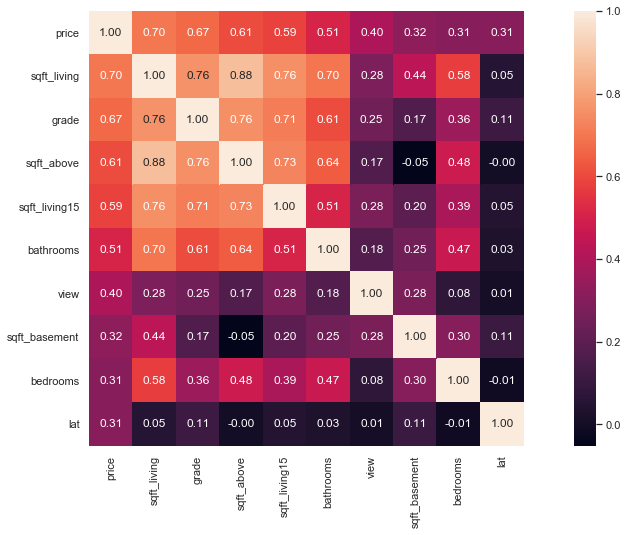

In [13]:
correlation_map = np.corrcoef(house_data[top_10_corr_columns].values.T)

plt.figure(figsize=(18, 8))
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar = True, annot=True, square=True, fmt='.2f', 
                      yticklabels=top_10_corr_columns.values, xticklabels=top_10_corr_columns.values)

plt.show()

### Applying Scalling

In [14]:
house_data['price'] = np.log(house_data['price'])
house_data['sqft_living'] = np.log(house_data['sqft_living'])
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
id,,,,,,,,,,,,,,,,,,,
7129300520,12.31,3,1,7.07,5650,1,0,0,3,7,1180,0,98178,47.51,-122.26,1340,5650,59,0
6414100192,13.20,3,2,7.85,7242,2,0,0,3,7,2170,400,98125,47.72,-122.32,1690,7639,63,1
5631500400,12.10,2,1,6.65,10000,1,0,0,3,6,770,0,98028,47.74,-122.23,2720,8062,82,0
2487200875,13.31,4,3,7.58,5000,1,0,0,5,7,1050,910,98136,47.52,-122.39,1360,5000,49,0
1954400510,13.14,3,2,7.43,8080,1,0,0,3,8,1680,0,98074,47.62,-122.05,1800,7503,28,0


## 3. Baseline algorithm test

### Split dataset into traing and testing set

In [15]:
X = house_data[top_10_corr_columns]

y = X['price'].values
X = X.drop('price', axis=1).values


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42)

### Import models

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.metrics import mean_squared_error, r2_score

### Applying Linear Regression model and  predict values

In [18]:
linear_regression = LinearRegression().fit(X_train, y_train)

y_pred = linear_regression.predict(X_test)
y_pred

array([12.91962497, 13.46627422, 14.08519434, ..., 12.76425465,
       13.13833051, 12.77837006])

### Linear regression score

In [19]:
linear_regression.score(X, y)

0.7308152086219801

### Varience score

In [20]:
varience_score = r2_score(y_test, y_pred)
varience_score

0.7337632707954124

### Linear regression coefficients

In [21]:
linear_regression.coef_

array([ 1.69644261e-01,  1.30675800e-01,  1.09373902e-04,  7.19121850e-05,
        1.94868021e-02,  1.01666982e-01,  1.39476817e-04, -8.97245367e-03,
        1.49159041e+00])

### Mean square error

In [22]:
mse = mean_squared_error(y_test, y_pred)
mse

0.07588599737572041

### Compaire Predicted values and test values

In [23]:
df = pd.DataFrame({'Predicted values': y_pred, 'Test values': y_test})
df.sample(10)

,Predicted values,Test values
3324,12.78,12.78
2246,13.41,13.77
3715,13.03,12.85
4000,13.05,13.47
2212,13.47,13.38
1516,12.89,13.03
2522,13.02,12.88
1936,13.59,13.61
2337,14.13,13.96
775,12.42,12.48


### Graphical view of test values vs predicted values, (Only 20 - 20 data points are taken)

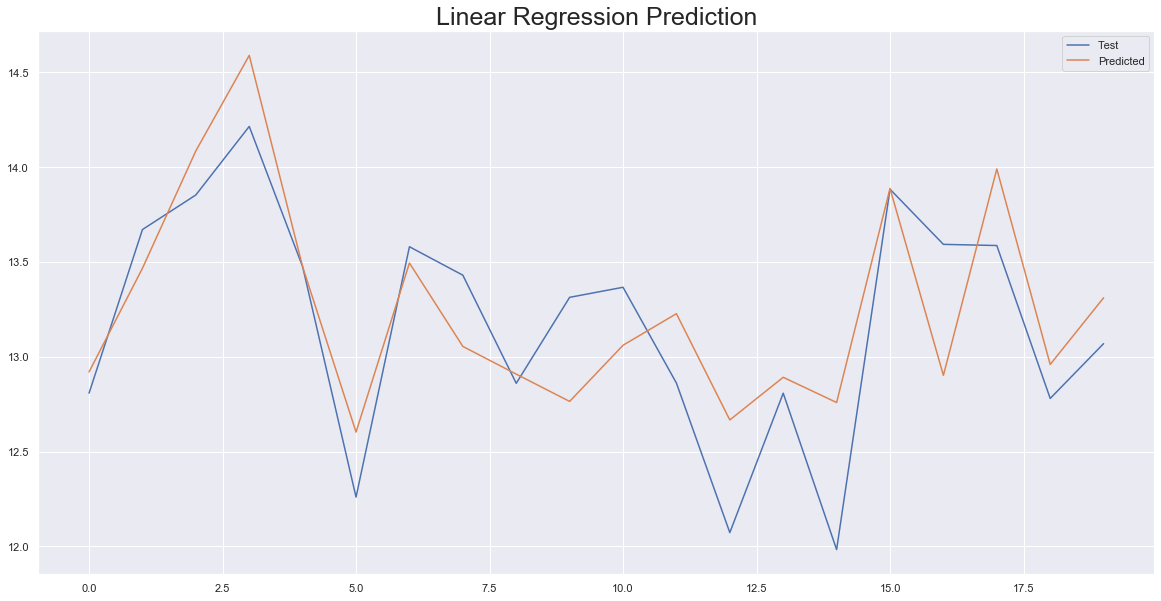

In [24]:
plt.figure(figsize=(20, 10))

plt.plot(y_test[:20], label='Test')
plt.plot(y_pred[:20], label='Predicted')
plt.legend()
plt.title('Linear Regression Prediction', fontsize=25)
plt.show()

### Importing libraries for DecisionTreeRegression

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.metrics import mean_squared_log_error

from sklearn.model_selection import learning_curve

### Predict values by DecisionTreeRegression 

In [26]:
decision_tree_estimator = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = decision_tree_estimator.predict(X_test)
print(y_pred)

[12.80765263 13.47019937 14.71159858 ... 12.49500394 13.65299163
 12.73667148]


### Find estimator score using cross-validation score

In [27]:
estimator_score = cross_val_score(decision_tree_estimator, X_train, y_train, cv=5)
estimator_score

array([0.68079264, 0.67783789, 0.67404798, 0.68536354, 0.66228429])

### Compaire predicted values vs test values

In [28]:
df = pd.DataFrame({'Predicted values': y_pred, 'Test values' : y_test})
df.sample(10)

,Predicted values,Test values
1612,12.51,12.71
364,13.57,13.42
2947,13.49,13.42
3494,13.88,14.05
1111,13.54,13.02
2512,12.64,12.61
3034,12.52,12.64
2450,12.85,13.02
1250,13.53,13.02
180,12.81,12.43


### Mean absolute error

In [29]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.21563236129282487

### r2_score

In [30]:
r2_score = r2_score(y_test, y_pred),
r2_score

(0.6932265053367421,)

### Mean score error

In [31]:
mse = mean_squared_error(y_test, y_pred)
mse

0.08744027422702962

### Graphical view of test values vs predicted values, (Only 20 - 20 data points are taken)

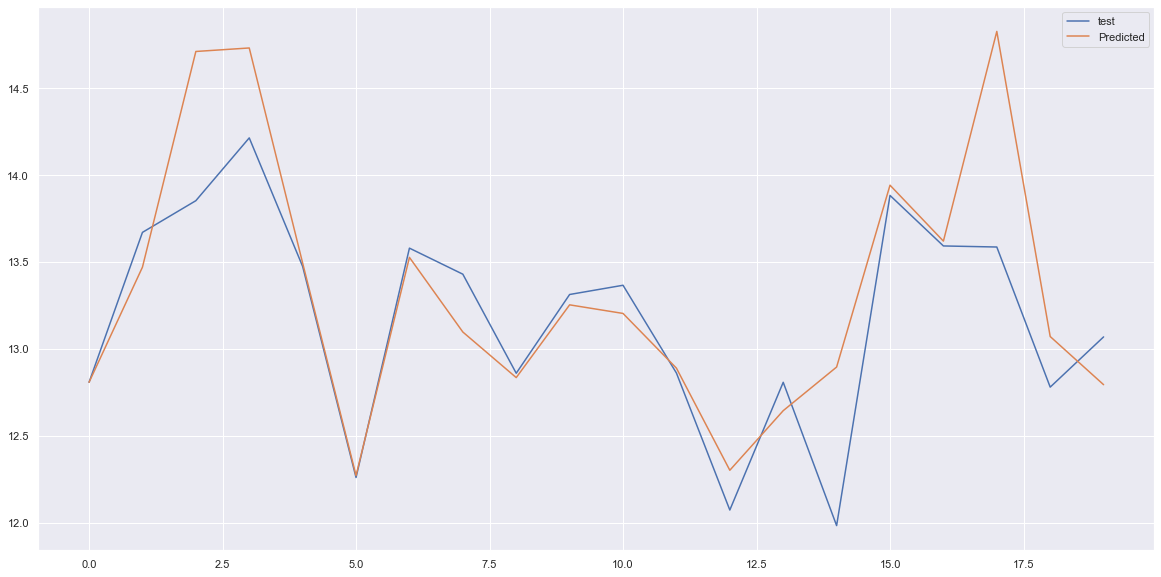

In [32]:
plt.figure(figsize=(20, 10))

plt.plot(y_test[:20], label='test')
plt.plot(y_pred[:20], label='Predicted')
plt.legend()
plt.show()

### Learning Curve
#### __Note:-__ __In Learning curve, which has cross validation increases which increases training score is good model __

In [33]:
'''def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2

X2, y2 = randomize(X_train, y_train)'''

'def randomize(X, Y):\n    permutation = np.random.permutation(Y.shape[0])\n    X2 = X[permutation,:]\n    Y2 = Y[permutation]\n    return X2, Y2\n\nX2, y2 = randomize(X_train, y_train)'

In [34]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [35]:
def draw_learning_curves(X, y, estimator, cv=None):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
    plt.figure(figsize=(12,8))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid(True)

    plt.title("Learning Curves", fontsize=22)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()

### Learning curve for linear regression estimator

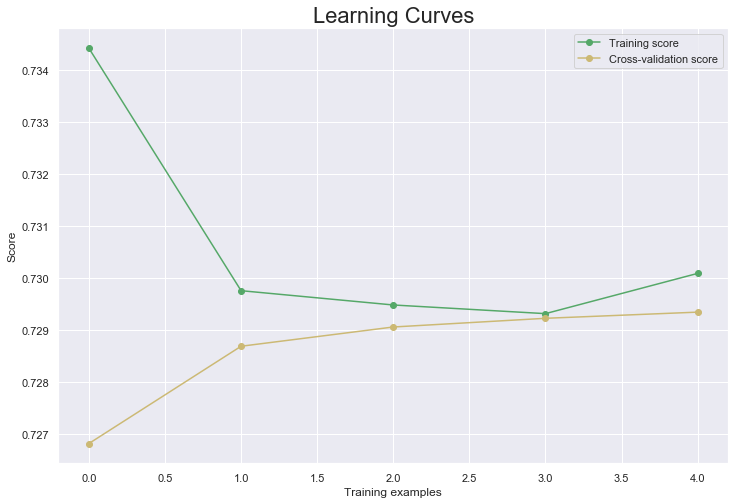

In [36]:
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
draw_learning_curves(X_train, y_train, linear_regression, cv)

### Learning curve for decision tree estimator

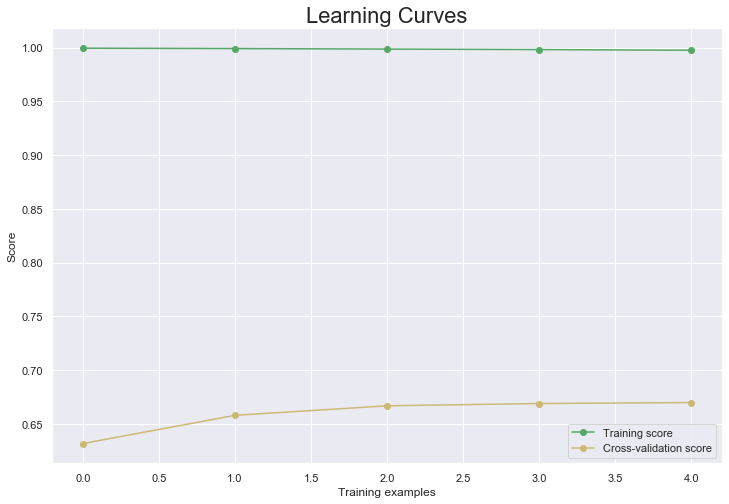

In [37]:
draw_learning_curves(X_train, y_train, decision_tree_estimator, cv)

### Learning curve for KNeighborRegresor estimator

In [38]:
knr = KNeighborsRegressor()

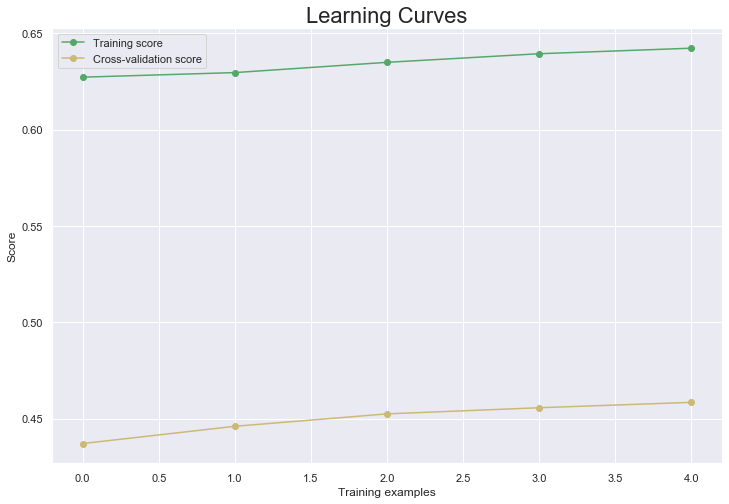

In [39]:
draw_learning_curves(X_train, y_train, knr, cv)

### Learning curve for GradientBoostingRegressor estimator

In [40]:
gb = GradientBoostingRegressor()

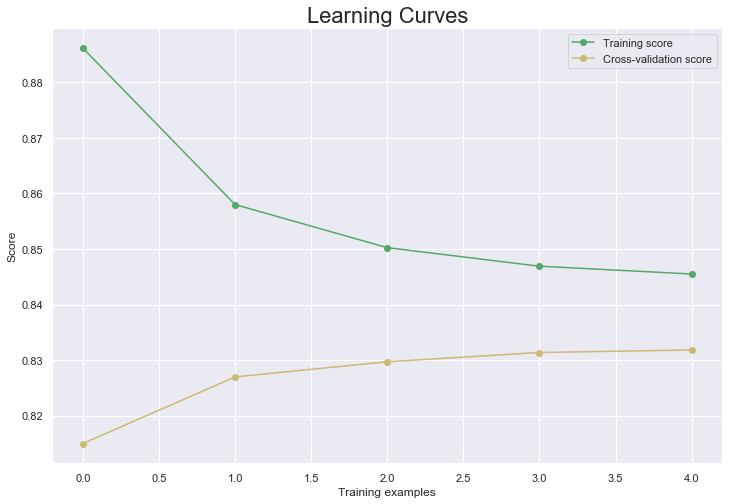

In [41]:
draw_learning_curves(X_train, y_train, gb, cv)

### Learning curve for Lasso estimator

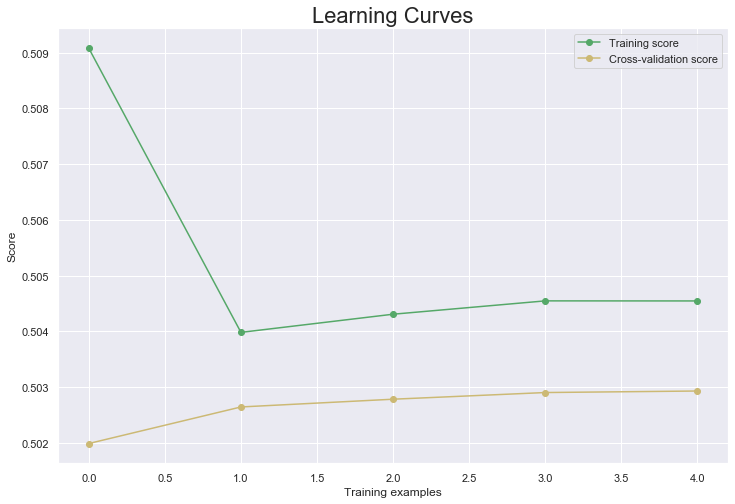

In [42]:
ls = Lasso()
draw_learning_curves(X_train, y_train, ls, cv)

### It will be updated soon that in LinearRegression predicted values approximate are good but Learning curve are not good, after more search

### You can also share some idea what's goining wrong if any?